In [36]:
from bilinear_interpolation import *
from nearest_neighbour_interpolation import *
from bicubic_interpolation import *
#from NEDI_gpt import *
from NEDI import *

from PIL import Image
from IPython.display import display
from math import log10, sqrt
import cv2
from skimage.metrics import structural_similarity as ssim

# Testing interpolation

Original image


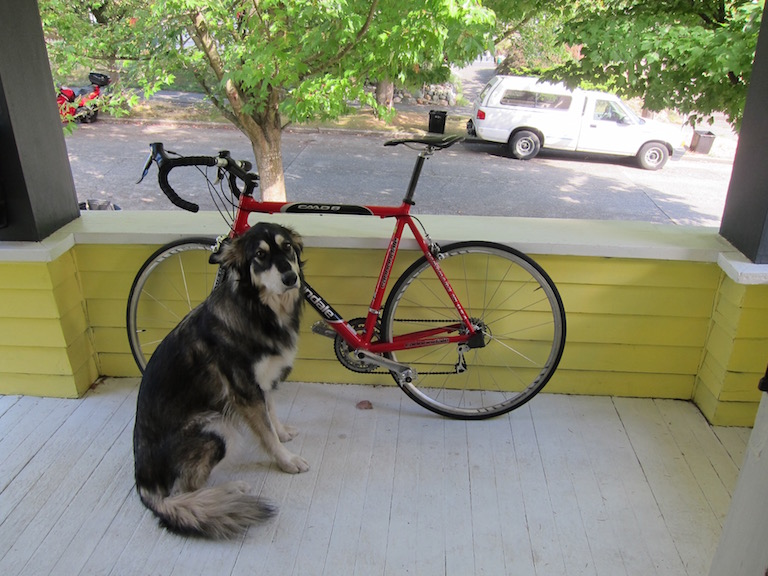

Original image with nearest neighbour interpolation


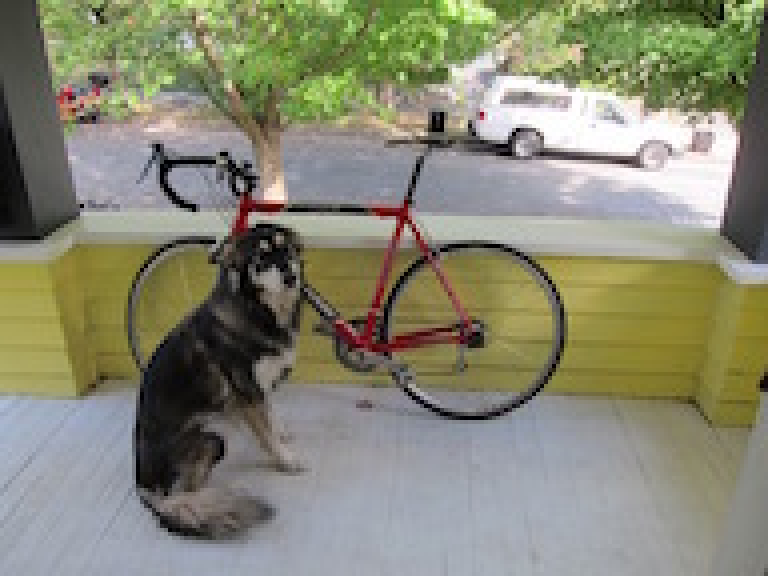

Original image with bilinear interpolation


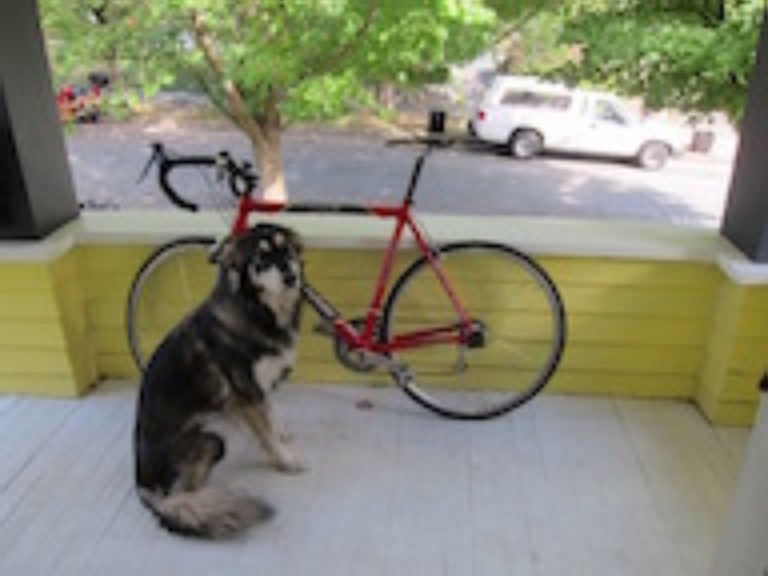

Original image with bicubic interpolation


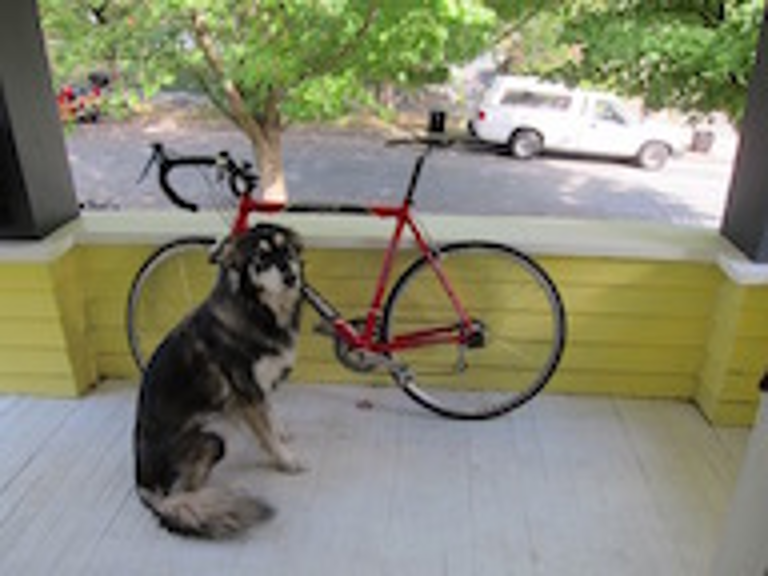

Original image with NEDI interpolation


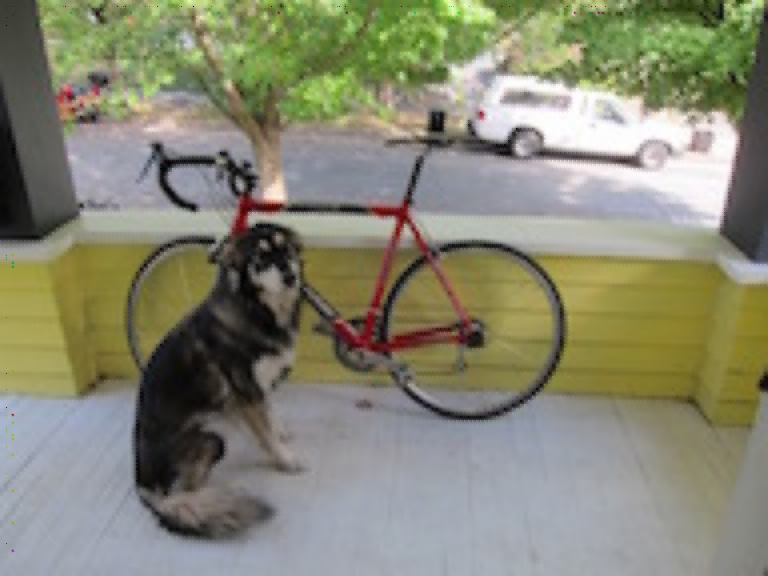

In [37]:
low_res_im = Image.open('dogsmall.jpg')
high_res_im = Image.open('dog.jpg')

width, height = int(low_res_im.width*4), int(low_res_im.height*4)

nearest_neighbour_im = imresize_nn(low_res_im, width, height)
bilinear_im = imresize_bi(low_res_im, width, height)
bicubic_im = imresize_bicubic(low_res_im, width, height)
nedi_im = EDI_predict(low_res_im, m=6)

print('Original image')
display(high_res_im)
print('Original image with nearest neighbour interpolation')
display(nearest_neighbour_im)
print('Original image with bilinear interpolation')
display(bilinear_im)
print('Original image with bicubic interpolation')
display(bicubic_im)
print('Original image with NEDI interpolation')
display(nedi_im)

# PSNR and SSIM

In [38]:
# https://www.geeksforgeeks.org/python-peak-signal-to-noise-ratio-psnr/
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

def SSIM(original, compressed):
    if original.ndim == 3:
        original = np.dot(original[..., :3], [0.2989, 0.5870, 0.1140])
    if compressed.ndim == 3:
        compressed = np.dot(compressed[..., :3], [0.2989, 0.5870, 0.1140])
    return ssim(original, compressed, data_range=compressed.max() - compressed.min())


In [39]:
# Convert images to NumPy arrays for PSNR calculation
original_np = np.array(high_res_im)
nearest_neighbour_np = np.array(nearest_neighbour_im)
bilinear_np = np.array(bilinear_im)
nedi_np = np.array(nedi_im)

psnr_nearest_neighbour = PSNR(original_np, nearest_neighbour_np)
print(f"PSNR: Nearest Neighbour Interpolation vs. Original Image: {psnr_nearest_neighbour:.2f} dB")

ssim_nearest_neighbour = SSIM(original_np, nearest_neighbour_np)
print(f"SSIM: Nearest Neighbour Interpolation vs. Original Image: {ssim_nearest_neighbour:.2f}\n")

psnr_bilinear = PSNR(original_np, bilinear_np)
print(f"PSNR: Bilinear Interpolation vs. Original Image: {psnr_bilinear:.2f} dB")

ssim_bilinear = SSIM(original_np, bilinear_np)
print(f"SSIM: Bilinear Interpolation vs. Original Image: {ssim_bilinear:.2f}\n")

psnr_bicubic = PSNR(original_np, bicubic_np)
print(f"PSNR: Bicubic Interpolation vs. Original Image: {psnr_bicubic:.2f} dB")

ssim_bicubic = SSIM(original_np, bicubic_np)
print(f"SSIM: Bicubic Interpolation vs. Original Image: {ssim_bicubic:.2f}\n")

psnr_nedi = PSNR(original_np, nedi_np)
print(f"PSNR: Nedi Interpolation vs. Original Image: {psnr_nedi:.2f} dB")

ssim_nedi = SSIM(original_np, nedi_np)
print(f"SSIM: Nedi Interpolation vs. Original Image: {ssim_nedi:.2f}\n")

PSNR: Nearest Neighbour Interpolation vs. Original Image: 31.52 dB
SSIM: Nearest Neighbour Interpolation vs. Original Image: 0.70

PSNR: Bilinear Interpolation vs. Original Image: 31.82 dB
SSIM: Bilinear Interpolation vs. Original Image: 0.73



NameError: name 'bicubic_np' is not defined